# Example - the impact of HTC on SAP rating

This notebook:
- uses the sap10calcs Python package https://github.com/stevenkfirth/sap10calcs
- creates a SAP10 model of a detached house
- alters the Heat Transfer Coefficient of the house
- plots the impact on the SAP rating

For more information on SAP10, please see: https://www.stevenfirth.com/

## 1. Setup

In [1]:
# import packages
import sap10calcs
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.patheffects as pe
from IPython.display import Image

In [2]:
# filepaths
fp_in = 'Example - creating a complete SAP XML file.xml'

In [3]:
# set authorization token for API
auth_token = None

## 2. Create a SAP10 input file

See: https://stevenkfirth.github.io/sap10calcs/sap_schema_19_1_0.html

In [25]:
# create new sap_report element
tree, sap_report = sap10calcs.create_sap_report_xml() 

# sap10_data
sap10_data = sap_report.add_sap10_data()
sap10_data.add_data_type().value = 'new dwelling as designed'

# sap_property_details
sap_property_details = sap10_data.add_sap_property_details()
sap_property_details.add_cold_water_source().value = 'mains'
sap_property_details.add_living_area().value = 30
sap_property_details.add_windows_overshading().value = 'average or unknown'

# sap_building_parts
sap_building_parts = sap_property_details.add_sap_building_parts()

# sap_building_part_1
sap_building_part_1 = sap_building_parts.add_sap_building_part()
sap_building_part_1.add_building_part_number().value = 1

# sap_floor_dimensions_1
sap_floor_dimensions_1 = sap_building_part_1.add_sap_floor_dimensions()

# sap_floor_dimension_1_1
sap_floor_dimension_1_1 = sap_floor_dimensions_1.add_sap_floor_dimension()
sap_floor_dimension_1_1.add_floor_type().value = 'ground floor'
sap_floor_dimension_1_1.add_storey().value = 'Ground'
sap_floor_dimension_1_1.add_total_floor_area().value = 100
sap_floor_dimension_1_1.add_storey_height().value = 3
sap_floor_dimension_1_1.add_heat_loss_area().value = 100
sap_floor_dimension_1_1.add_u_value().value = 0.5

# sap_walls_1
sap_walls_1 = sap_building_part_1.add_sap_walls()

# sap_wall_1_1
sap_wall_1_1 = sap_walls_1.add_sap_wall()
sap_wall_1_1.add_wall_type().value = 'exposed wall'
sap_wall_1_1.add_total_wall_area().value = 120
sap_wall_1_1.add_u_value().value = 0.5
sap_wall_1_1.add_name().value = 'sap_wall_1_1'

# sap_roofs_1
sap_roofs_1 = sap_building_part_1.add_sap_roofs()

# sap_roof_1_1
sap_roof_1_1 = sap_roofs_1.add_sap_roof()
sap_roof_1_1.add_total_roof_area().value = 100
sap_roof_1_1.add_u_value().value = 0.5
sap_roof_1_1.add_roof_type().value = 'exposed roof'
sap_roof_1_1.add_name().value = 'sap_roof_1_1'

# sap_openings_1
sap_openings_1 = sap_building_part_1.add_sap_openings()

# sap_opening_1_1
sap_opening_1_1 = sap_openings_1.add_sap_opening()
sap_opening_1_1.add_type().value = 'sap_opening_type_1'
sap_opening_1_1.add_height().value = 1.5
sap_opening_1_1.add_width().value = 5
sap_opening_1_1.add_location().value = 'sap_wall_1_1'
sap_opening_1_1.add_orientation().value = 'South'

# sap_opening_types
sap_opening_types = sap_property_details.add_sap_opening_types()

# sap_opening_type_1
sap_opening_type_1 = sap_opening_types.add_sap_opening_type()
sap_opening_type_1.add_name().value = 'sap_opening_type_1'
sap_opening_type_1.add_type().value = 'window'
sap_opening_type_1.add_data_source().value = 'manufacturer declaration'
sap_opening_type_1.add_u_value().value = 1.5
sap_opening_type_1.add_glazing_type().value = 'double'

# sap_thermal_bridges
sap_thermal_bridges_1 = sap_building_part_1.add_sap_thermal_bridges()
sap_thermal_bridges_1.add_thermal_bridge_code().value = 'default'

# sap_heating
sap_heating = sap_property_details.add_sap_heating()
sap_heating.add_has_hot_water_cylinder().value = False
sap_heating.add_thermal_store().value = 'none'
sap_heating.add_secondary_heating_category().value = 'none'
sap_heating.add_water_heating_code().value = 901  # From main heating system

# main_heating_details
main_heating_details = sap_heating.add_main_heating_details()

# main_heating_1
main_heating_1 = main_heating_details.add_main_heating()
main_heating_1.add_main_heating_number().value = 1
main_heating_1.add_main_fuel_type().value = 'Gas: mains gas'
main_heating_1.add_main_heating_category().value = 'boiler with radiators or underfloor heating'
main_heating_1.add_main_heating_data_source().value = 'from SAP table'
main_heating_1.add_main_heating_code().value = 104  
    # "Gas boilers (including mains gas, LPG and biogas) 1998 or later: Condensing combi with automatic ignition"
main_heating_1.add_is_central_heating_pump_in_heated_space().value = True
main_heating_1.add_main_heating_fraction().value = 1
main_heating_1.add_heat_emitter_type().value = 'radiators'
main_heating_1.add_main_heating_control().value = 2106  # "Programmer, room thermostat and TRVs"
main_heating_1.add_has_separate_delayed_start().value = False
main_heating_1.add_is_interlocked_system().value = False

# ventilation
sap_ventilation = sap_property_details.add_sap_ventilation()
sap_ventilation.add_open_chimneys_count().value = 0
sap_ventilation.add_open_flues_count().value = 0
sap_ventilation.add_closed_flues_count().value = 0
sap_ventilation.add_boilers_flues_count().value = 0
sap_ventilation.add_other_flues_count().value = 0
sap_ventilation.add_blocked_chimneys_count().value = 0
sap_ventilation.add_extract_fans_count().value = 0
sap_ventilation.add_psv_count().value = 0
sap_ventilation.add_flueless_gas_fires_count().value = 0
sap_ventilation.add_pressure_test().value = 'yes (new dwelling, design value)'
sap_ventilation.add_air_permeability().value = 3.5
sap_ventilation.add_sheltered_sides_count().value = 2
sap_ventilation.add_ventilation_type().value = 'natural with intermittent extract fans'

# SAP-Energy-Source
sap_energy_source = sap_property_details.add_sap_energy_source()
sap_energy_source.add_electricity_tariff().value = 'standard tariff'

# display final input file
print(sap_report.display(show_values = True))

<SAP-Report xmlns="https://epbr.digital.communities.gov.uk/xsd/sap">
  <Schema-Version-Original>SAP-Schema-19.1.0</Schema-Version-Original>
  <SAP-Version>10.2 ['SAP version 10.2, dated Oct 2020']</SAP-Version>
  <SAP10-Data>
    <Data-Type>1 ['new dwelling as designed']</Data-Type>
    <SAP-Property-Details>
      <Cold-Water-Source>1 ['mains']</Cold-Water-Source>
      <Living-Area>30</Living-Area>
      <Windows-Overshading>2 ['average or unknown']</Windows-Overshading>
      <SAP-Building-Parts>
        <SAP-Building-Part>
          <Building-Part-Number>1</Building-Part-Number>
          <SAP-Floor-Dimensions>
            <SAP-Floor-Dimension>
              <Floor-Type>2 ['ground floor']</Floor-Type>
              <Storey>0 ['Ground']</Storey>
              <Total-Floor-Area>100</Total-Floor-Area>
              <Storey-Height>3</Storey-Height>
              <Heat-Loss-Area>100</Heat-Loss-Area>
              <U-Value>0.5</U-Value>
            </SAP-Floor-Dimension>
          </SAP-

## 2. Run simulations

In [5]:
# run test simulation
api_result = sap10calcs.calculate(
    input_lxml = sap_report,
    auth_token = auth_token
)
print('HTC:', api_result['sap_calculation_output_dict']['value_39'])
print('SAP rating: ', api_result['sap_calculation_output_dict']['value_258'])
print('SAP band: ', api_result['sap_calculation_output_dict']['sap_band'])

HTC: 239.18819278288757
SAP rating:  73
SAP band:  C


In [6]:
# run all simulations
# - vary HTC between 10 and 500
HTCs = range(10, 510, 10)
api_results = []
for HTC in HTCs:
    print(HTC, end = ' ')
    overwrite = {f'value_39_{m}': HTC for m in range(1,13)}
    overwrite.update({'value_39': HTC})
    api_result = sap10calcs.calculate(
        input_lxml = sap_report,
        extra = {'overwrite': overwrite},
        auth_token = auth_token
    )
    api_results.append(api_result)

10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 

## 3. Plot figure

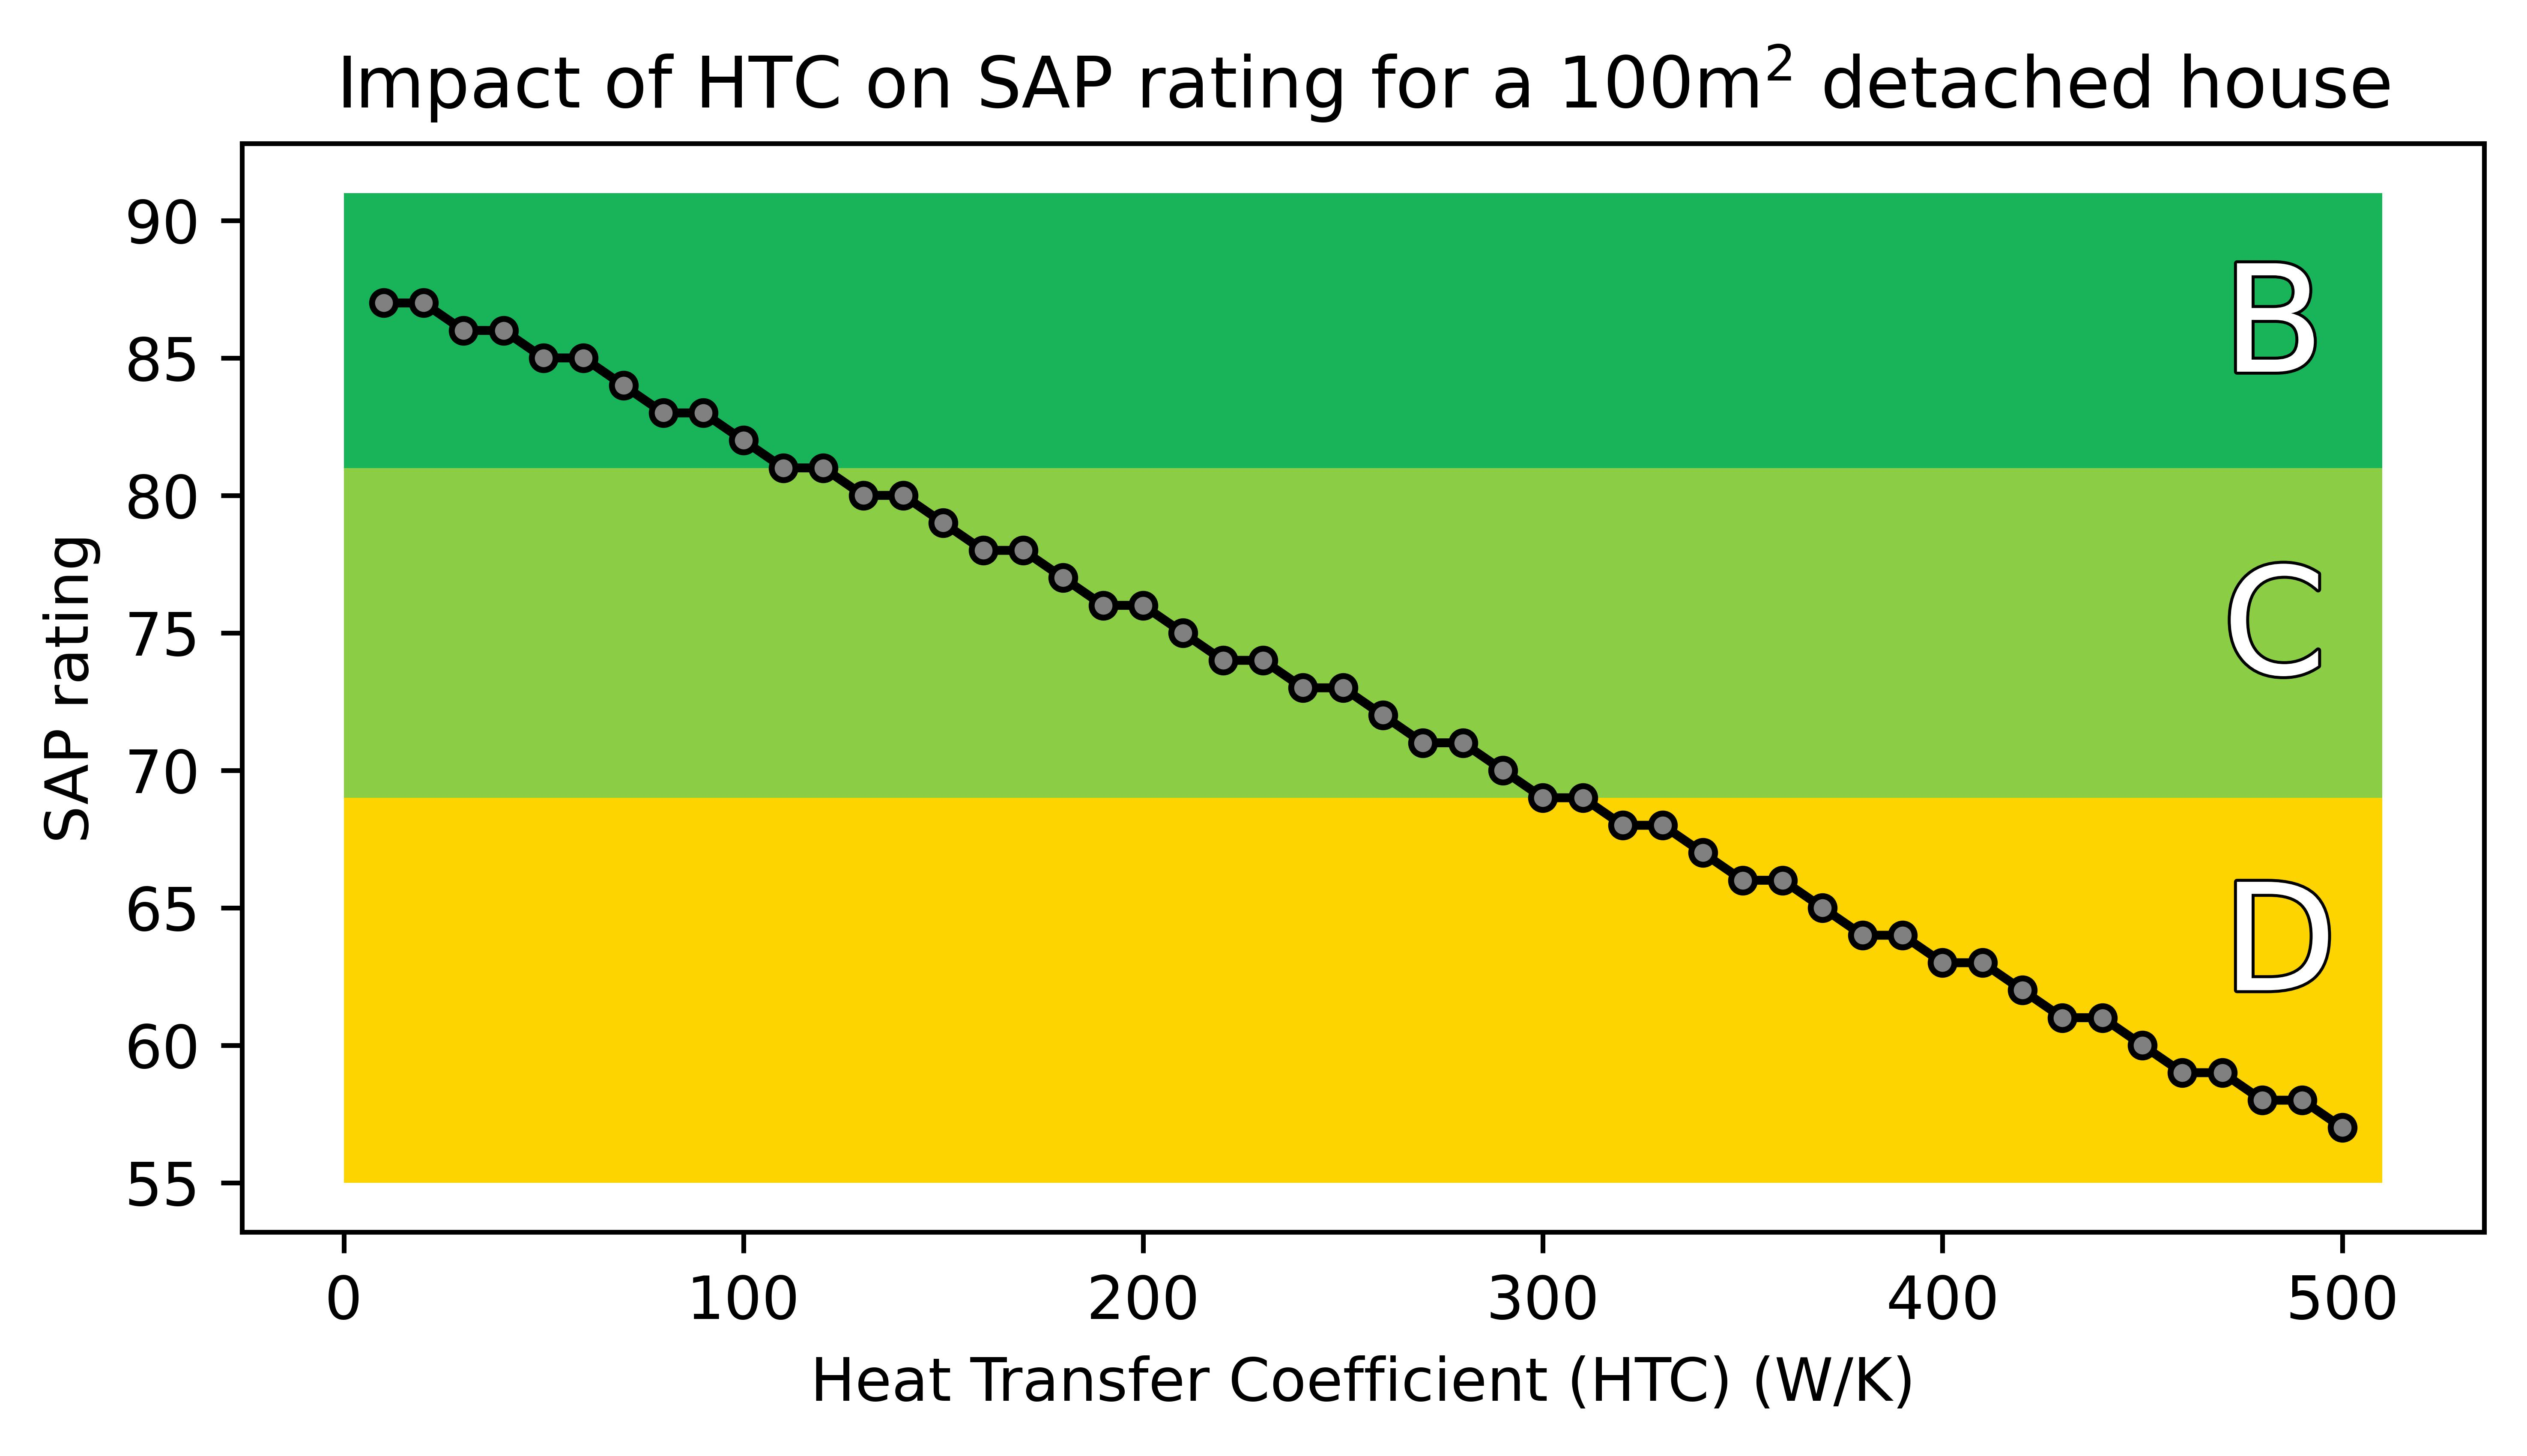

In [40]:
# get data
x = [x['sap_calculation_output_dict']['value_39'] for x in api_results]
y = [x['sap_calculation_output_dict']['value_258'] for x in api_results]
# main plot
fig, ax = plt.subplots(figsize = (6, 3.5), dpi = 1000)
ax.plot(x, y, color = 'black', marker = 'o', markersize =4, markerfacecolor = 'grey')
ax.set_title('Impact of HTC on SAP rating for a 100m$^2$ detached house')
ax.set_xlabel('Heat Transfer Coefficient (HTC) (W/K)')
ax.set_ylabel('SAP rating')
# add EPC bands
ax.add_patch(patches.Rectangle((0, 81), 510, 10, linewidth = 1, facecolor = [x/256 for x in (25,180,89)]))
ax.text(470, 84.5, 'B', color = 'white', fontsize = 25, path_effects=[pe.withStroke(linewidth=1, foreground="black")])
ax.add_patch(patches.Rectangle((0, 69), 510, 12, linewidth = 1, facecolor = [x/256 for x in (141,206,70)]))
ax.text(470, 73.5, 'C', color = 'white', fontsize = 25, path_effects=[pe.withStroke(linewidth=1, foreground="black")])
ax.add_patch(patches.Rectangle((0, 55), 510, 14, linewidth = 1, facecolor = [x/256 for x in (255,213,0)]))
ax.text(470, 62, 'D', color = 'white', fontsize = 25, path_effects=[pe.withStroke(linewidth=1, foreground="black")])
# save figure
fig.tight_layout()
for fmt in ['jpeg', 'png']:
    fig.savefig(f'Example - the impact of HTC on SAP rating.{fmt}', format = fmt, bbox_inches='tight')
plt.close()
display(Image(filename=f'Example - the impact of HTC on SAP rating.jpeg', width = 800, height = 800 * 1 ) )